# Exploring the iris dataset with Pandas

## First thing: import the pandas module.

In [1]:
import pandas as pd

You can find more information and tutorials on pandas here:

https://pandas.pydata.org/pandas-docs/stable/10min.html

https://pandas.pydata.org/pandas-docs/stable/tutorials.html

## Second: import the data.
We will play with famous Iris dataset. This dataset can be found in many places on the net and was first released at https://archive.ics.uci.edu/ml/index.php. For example it is stored on Kaggle https://www.kaggle.com/uciml/iris/ , with many demos and Jupyter notebooks you can test (have a look at the "kernels" tab).
![Iris Par Za — Travail personnel, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=144395](imgTuto1/152px-Iris_germanica_002.jpg)

In [2]:
irisData = pd.read_csv('Iris.csv')
irisData.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


The description of the entries is given here:
https://www.kaggle.com/uciml/iris/home

In [3]:
irisData['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
irisData.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Let make a graph from the features

We are going to build a graph from these data. The idea is to represent iris samples (rows of the table) as nodes, with connections depending on their physical similarity. 

The main question is to define the notion of similarity between the flowers. For that, we need to introduce a measure of similarity. It should use the properties of the flowers and provide a positive real value for each pair of samples.

Let us separate the data into two parts, physical properties and labels.

In [5]:
irisfeatures = irisData.loc[:,['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
irisSpecies = irisData.loc[:,'Species']

In [6]:
irisfeatures.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
irisSpecies.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

Let us import the necessary tools for computing efficiently the similarity.

In [8]:
import numpy as np

In [10]:
from scipy.spatial.distance import pdist,squareform

The function `pdist` compute the pairwise distance. By default it is the Euclidian distance. `irisfeatures.values` is a numpy array extracted from the Pandas dataframe. Very handy.

In [11]:
weights = pdist(irisfeatures.values)

In [14]:
pdist?

In [13]:
# Turn the list of weights into a matrix
W = squareform(weights)

Sometimes, you may need to compute additional features before processing them with some machine learning or some other data processing step. With Pandas, it is as simple as that:

In [16]:
# Compute a new column using the existing ones
irisfeatures['SepalLSquared'] = irisfeatures['SepalLengthCm']**2
irisfeatures.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,SepalLSquared
0,5.1,3.5,1.4,0.2,26.01
1,4.9,3.0,1.4,0.2,24.01
2,4.7,3.2,1.3,0.2,22.09
3,4.6,3.1,1.5,0.2,21.16
4,5.0,3.6,1.4,0.2,25.00


Coming back to the weight matrix, we have obtained a full matrix but we may not need all the connections (reducing the number of connections saves some space and computations!). We can sparsify the graph by removing the values (edges) below some fixed threshold. Let us see what kind of threshold we could use:

In [17]:
import matplotlib.pyplot as plt

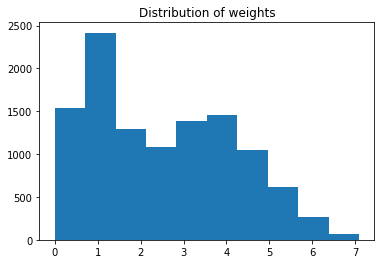

In [18]:
plt.hist(weights)
plt.title('Distribution of weights')
plt.show()

In [19]:
# Let us choose a threshold of 3
W[W<3] = 0

To conclude the construction of the graph, let us visualize it. We will use the python module named `networkx`. Don't forget to run `pip install networkx` in the command line beforehand.

In [20]:
import networkx as nx

In [21]:
# A simple command to create the graph from the weight matrix
G = nx.from_numpy_array(W)

In [22]:
# Save the graph to a gexf file, readable by Gephi
nx.write_gexf(G,'irisGraph.gexf')

Let us try some direct visualizations using networkx

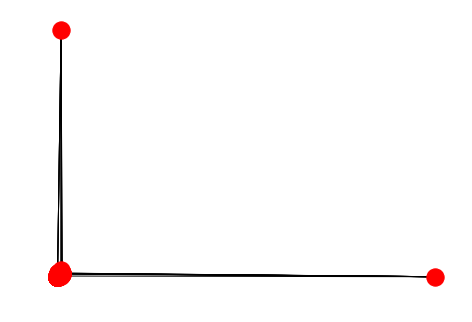

In [23]:
nx.draw_spectral(G)

Oh! It seems to be separated in 3 parts! Are they related to the 3 different species of iris?

Let us try another one, where the edges are modeled as springs:

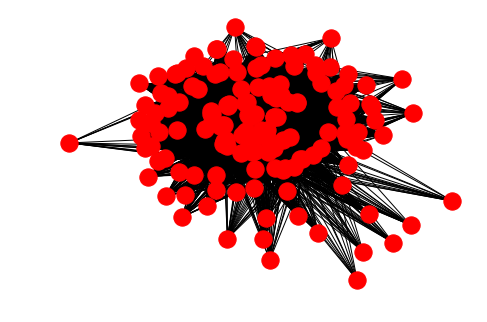

In [25]:
nx.draw_spring(G)

You may now explore the graph using Gephi and compare the visualizations.